# COMP 4030 Assignment 7 SOLUTION

**Deadline: 12/05/2023**

Here's how to create a random network with 10 nodes, connection probability of 0.35 and 2023 as the seed.

Using a different `seed` produces a different network.

Connection probability is between 0 and 1.  A higher value results in more connections in the network.


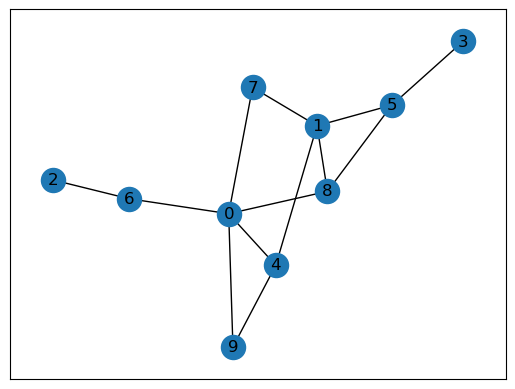

In [7]:
import networkx as nx
a_network = nx.gnp_random_graph(10, 0.35, seed=2023)
nx.draw_networkx(a_network)

A network of stations and roads, which connect stations together in some way, can be represented as a graph with nodes and edges.

Run the code below, you see a network with 10 stations and 13 roads.
```
import networkx as nx
a_network = nx.gnp_random_graph(10, 0.35, seed=2023)
nx.draw_networkx(G, with_labels=True)
```

Below are a few ways of getting information from a network.

In [3]:
for node in a_network:
    print(len(a_network[node]), 'neighbors of node', node, 'are:')
    for u in a_network[node]:
        print('\t', u)

5 neighbors of node 0 are:
	 4
	 6
	 7
	 8
	 9
4 neighbors of node 1 are:
	 4
	 5
	 7
	 8
1 neighbors of node 2 are:
	 6
1 neighbors of node 3 are:
	 5
3 neighbors of node 4 are:
	 0
	 1
	 9
3 neighbors of node 5 are:
	 1
	 3
	 8
2 neighbors of node 6 are:
	 0
	 2
2 neighbors of node 7 are:
	 0
	 1
3 neighbors of node 8 are:
	 0
	 1
	 5
2 neighbors of node 9 are:
	 0
	 4


Here are all the edges:

In [8]:
a_network.edges

EdgeView([(0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (1, 4), (1, 5), (1, 7), (1, 8), (2, 6), (3, 5), (4, 9), (5, 8)])

How to check if (u, v) is an edge (i.e. there's a connection between u and v):

In [19]:
print(
    (0,6) in a_network.edges,
    (0,1) in a_network.edges    
)

True False


---

**Problem 1**  (15 points)

Go through all nodes and find the one that has the most number of connections.

For example, in the network above node 0 has the most number of connections.

In [21]:
#
# Output: the node with the most number of connections
#
def most_connected_node(network):
    # A = []
    # for n in network:
    #     A.append((len(network[n]), n))
    # return max(A)
    return max([(len(network[n]),n) for n in network])

most_connected_node(a_network)

(5, 0)

---

**Problem 2**  (15 points)

Imagine a network of roads that need to be monitored. If we place a police station at node 0, then all of the 5 connections to node 0 are monitored.  These are (0,4), (0,6), (0,7), (0,8), (0,9).

Write a program that determines all the connections that are monitored by a set of nodes, which have police stations.

For example, `monitored_connections(a_network, [1, 5])` returns this set of connections: `{(1,4), (1,5), (1,7), (1,8), (5,3), (5,8)}`

Note that the output is a set. So the order is does not matter.

In [27]:
#
# Output: a set of connections monitored by police stations placed 
#         at "nodes"
#
def monitored_connections(network, nodes):
    connections = set()
    for n in nodes:
        for u in network[n]:
            # print(n, u)
            if n<u:
                connections.add((n,u))
            else:
                connections.add((u,n))
    return connections
    
monitored_connections(a_network, [1, 5])

{(1, 4), (1, 5), (1, 7), (1, 8), (3, 5), (5, 8)}

---

**Problem 3**  (15 points)

Given a set of nodes in a network, determine if the nodes can monitor all roads (connections) in the network, if police stations are placed at these nodes.

For example, give the network above:
* can_monitor(network, [0, 1, 9]) returns False
* can_monitor(network, [0, 1, 5, 6, 9]) returns True


In [29]:
def can_monitor(network, nodes):
    connections = monitored_connections(network, nodes)
    return len(connections) == len(network.edges)

print(can_monitor(a_network, [0,1,9]))
print(can_monitor(a_network, [0,1,5,6,9]))


False
True


---

Use the following backtrack template for the next problems:

In [32]:

def get_set(solution):
    return set([i for i in range(len(solution)) if solution[i]==True])

def backtrack(solution, i, possibilities, is_feasible=lambda sol, i: True):
    if is_feasible(solution, i):
        if i==len(solution):
            print(get_set(solution))
        else:
            for p in possibilities:
                solution[i] = p
                backtrack(solution, i+1, possibilities, is_feasible)
                

---
**Problem 4**  (15 points)

Use the backtrack template above to print out all sets of nodes in `network_A` defined below.

`solution` is a list of boolean values. `solution[0]` is True if node 0 is in the set.

`solution` has n indices, where n is the number of nodes.

Initially, `solution` is not configured.


In [33]:
network_A = nx.gnp_random_graph(10, 0.35, seed=2023)

backtrack(
    solution = [None]*len(network_A),
    i = 0,
    possibilities = [True, False],
    # everything is feasible
)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8}
{0, 1, 2, 3, 4, 5, 6, 7, 9}
{0, 1, 2, 3, 4, 5, 6, 7}
{0, 1, 2, 3, 4, 5, 6, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 8}
{0, 1, 2, 3, 4, 5, 6, 9}
{0, 1, 2, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 7, 8}
{0, 1, 2, 3, 4, 5, 7, 9}
{0, 1, 2, 3, 4, 5, 7}
{0, 1, 2, 3, 4, 5, 8, 9}
{0, 1, 2, 3, 4, 5, 8}
{0, 1, 2, 3, 4, 5, 9}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 6, 7, 8}
{0, 1, 2, 3, 4, 6, 7, 9}
{0, 1, 2, 3, 4, 6, 7}
{0, 1, 2, 3, 4, 6, 8, 9}
{0, 1, 2, 3, 4, 6, 8}
{0, 1, 2, 3, 4, 6, 9}
{0, 1, 2, 3, 4, 6}
{0, 1, 2, 3, 4, 7, 8, 9}
{0, 1, 2, 3, 4, 7, 8}
{0, 1, 2, 3, 4, 7, 9}
{0, 1, 2, 3, 4, 7}
{0, 1, 2, 3, 4, 8, 9}
{0, 1, 2, 3, 4, 8}
{0, 1, 2, 3, 4, 9}
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 5, 6, 7, 8}
{0, 1, 2, 3, 5, 6, 7, 9}
{0, 1, 2, 3, 5, 6, 7}
{0, 1, 2, 3, 5, 6, 8, 9}
{0, 1, 2, 3, 5, 6, 8}
{0, 1, 2, 3, 5, 6, 9}
{0, 1, 2, 3, 5, 6}
{0, 1, 2, 3, 5, 7, 8, 9}
{0, 1, 2, 3, 5, 7, 8}
{0, 1, 2, 3, 

---

**Problem 5**  (15 points)

Use the backtrack template above to print out all sets of 4 nodes in a network.   Use `network_A` as a test input.

In [38]:
def only_4_nodes(solution, i):
    nodes = get_set(solution[0:i])

    # this is optional, but it makes the algorithm faster
    if len(nodes) > 4:
        return False

    # at the end, we want solution to have exactly 4 nodes
    if i==len(solution) and len(nodes)!=4:
        return False
        
    return True
    
backtrack(
    solution = [None]*len(network_A),
    i = 0,
    possibilities = [True, False],
    is_feasible = only_4_nodes
)


{0, 1, 2, 3}
{0, 1, 2, 4}
{0, 1, 2, 5}
{0, 1, 2, 6}
{0, 1, 2, 7}
{0, 1, 2, 8}
{0, 1, 2, 9}
{0, 1, 3, 4}
{0, 1, 3, 5}
{0, 1, 3, 6}
{0, 1, 3, 7}
{0, 1, 3, 8}
{0, 1, 3, 9}
{0, 1, 4, 5}
{0, 1, 4, 6}
{0, 1, 4, 7}
{0, 1, 4, 8}
{0, 1, 4, 9}
{0, 1, 5, 6}
{0, 1, 5, 7}
{0, 1, 5, 8}
{0, 1, 5, 9}
{0, 1, 6, 7}
{0, 1, 6, 8}
{0, 1, 6, 9}
{0, 1, 8, 7}
{0, 1, 9, 7}
{0, 1, 8, 9}
{0, 2, 3, 4}
{0, 2, 3, 5}
{0, 2, 3, 6}
{0, 2, 3, 7}
{0, 8, 2, 3}
{0, 9, 2, 3}
{0, 2, 4, 5}
{0, 2, 4, 6}
{0, 2, 4, 7}
{0, 8, 2, 4}
{0, 9, 2, 4}
{0, 2, 5, 6}
{0, 2, 5, 7}
{0, 8, 2, 5}
{0, 9, 2, 5}
{0, 2, 6, 7}
{0, 8, 2, 6}
{0, 9, 2, 6}
{0, 8, 2, 7}
{0, 9, 2, 7}
{0, 8, 2, 9}
{0, 3, 4, 5}
{0, 3, 4, 6}
{0, 3, 4, 7}
{0, 8, 3, 4}
{0, 9, 3, 4}
{0, 3, 5, 6}
{0, 3, 5, 7}
{0, 8, 3, 5}
{0, 9, 3, 5}
{0, 3, 6, 7}
{0, 8, 3, 6}
{0, 9, 3, 6}
{0, 8, 3, 7}
{0, 9, 3, 7}
{0, 8, 3, 9}
{0, 4, 5, 6}
{0, 4, 5, 7}
{0, 8, 4, 5}
{0, 9, 4, 5}
{0, 4, 6, 7}
{0, 8, 4, 6}
{0, 9, 4, 6}
{0, 8, 4, 7}
{0, 9, 4, 7}
{0, 8, 4, 9}
{0, 5, 6, 7}
{0, 8, 5, 6}
{0, 9, 5, 6}

---

**Problem 6**  (15 points)

Use the backtrack template above to print out all sets of 4 nodes with at least 4 connections among the nodes in a network.  Use `network_A` as a test input.

For example, the set {0, 4, 8, 9} is a set with at least 4 connections among these nodes.   The connections are: {(0,4), (0,8), (0,9), (4,9)}.

{0, 1, 4, 7}
{0, 1, 4, 8}
{0, 1, 4, 9}
{0, 1, 5, 8}
{0, 1, 8, 7}
{0, 9, 4, 6}
{0, 9, 4, 7}
{0, 8, 4, 9}
{8, 1, 3, 5}
{8, 1, 4, 5}
{8, 1, 5, 7}


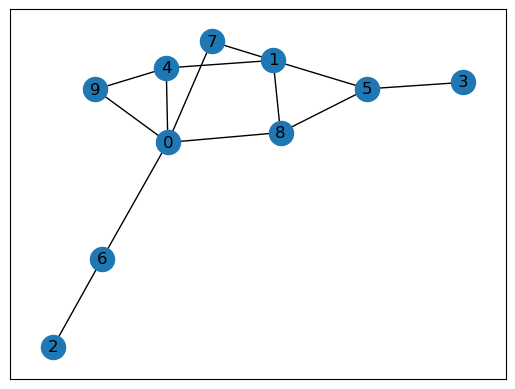

In [48]:
network_A = nx.gnp_random_graph(10, 0.35, seed=2023)

def shared_connections(network, nodes):
    connections = set()
    for u in nodes:
        for v in nodes:
            if u<v and (u,v) in network.edges:
                connections.add((u,v))
    return connections
    
def only_4_nodes(solution, i):
    nodes = get_set(solution[0:i])

    if len(nodes) > 4:
        return False
    
    if i==len(solution):
        if len(nodes)!=4:
            return False
        if len(shared_connections(network_A, nodes)) < 4:
            return False
            
    return True
    
backtrack(
    solution = [None]*len(network_A),
    i = 0,
    possibilities = [True, False],
    is_feasible = only_4_nodes
)

nx.draw_networkx(network_A)
# shared_connections(network_A, [1,8,5,3])

---

**Problem 7** (15 points)

Use the backtrack template above to print out all sets of nodes that can monitor the entire network if we place police stations at these nodes.

You can use `network_A` as a test input.

For example, the set of nodes {0,1,2,4,5,6} is one of such sets.

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8}
{0, 1, 2, 3, 4, 5, 6, 7, 9}
{0, 1, 2, 3, 4, 5, 6, 7}
{0, 1, 2, 3, 4, 5, 6, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 8}
{0, 1, 2, 3, 4, 5, 6, 9}
{0, 1, 2, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 7, 8}
{0, 1, 2, 3, 4, 5, 7, 9}
{0, 1, 2, 3, 4, 5, 7}
{0, 1, 2, 3, 4, 5, 8, 9}
{0, 1, 2, 3, 4, 5, 8}
{0, 1, 2, 3, 4, 5, 9}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 6, 7, 8}
{0, 1, 2, 3, 4, 6, 8, 9}
{0, 1, 2, 3, 4, 6, 8}
{0, 1, 2, 3, 4, 7, 8, 9}
{0, 1, 2, 3, 4, 7, 8}
{0, 1, 2, 3, 4, 8, 9}
{0, 1, 2, 3, 4, 8}
{0, 1, 2, 3, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 5, 6, 7, 9}
{0, 1, 2, 3, 5, 6, 8, 9}
{0, 1, 2, 3, 5, 6, 9}
{0, 1, 2, 3, 5, 7, 8, 9}
{0, 1, 2, 3, 5, 7, 9}
{0, 1, 2, 3, 5, 8, 9}
{0, 1, 2, 3, 5, 9}
{0, 1, 2, 3, 6, 7, 8, 9}
{0, 1, 2, 3, 6, 8, 9}
{0, 1, 2, 3, 7, 8, 9}
{0, 1, 2, 3, 8, 9}
{0, 1, 2, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 4, 5, 6, 7, 8}
{0, 1, 2, 4, 5, 6, 7, 9}
{0, 1, 2, 4, 5, 6, 7}
{0, 1, 2, 4, 5, 6, 8, 9}
{0, 1, 2, 4

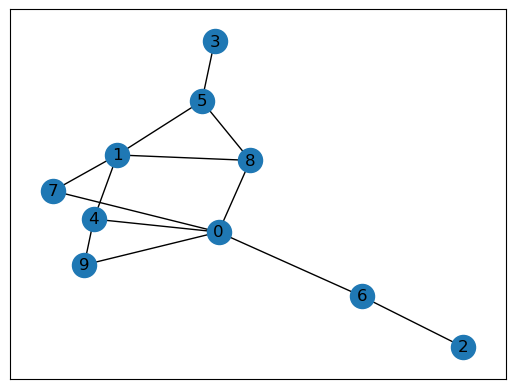

In [55]:
network_A = nx.gnp_random_graph(10, 0.35, seed=2023)

def monitored_connections(network, nodes):
    connections = set()
    for n in nodes:
        for u in network[n]:
            if n<u:
                connections.add((n,u))
            else:
                connections.add((u,n))
    return connections
    
def can_monitor_network(solution, i):
    nodes = get_set(solution[0:i])

    if i==len(solution):
        if len(monitored_connections(network_A, nodes)) < len(network_A.edges):
            return False
            
    return True
    
backtrack(
    solution = [None]*len(network_A),
    i = 0,
    possibilities = [True, False],
    is_feasible = can_monitor_network
)

nx.draw_networkx(network_A)
# monitored_connections(network_A, {0, 1, 2, 4, 5})

---
**Problem 8** (BONUS QUESTION: 10 points)

Given a network, find a placement of police stations with the fewest number of nodes to monitor the entire network.


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8}
{0, 1, 2, 3, 4, 5, 6, 7, 9}
{0, 1, 2, 3, 4, 5, 6, 7}
{0, 1, 2, 3, 4, 5, 6, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 8}
{0, 1, 2, 3, 4, 5, 6, 9}
{0, 1, 2, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 7, 8}
{0, 1, 2, 3, 4, 5, 7, 9}
{0, 1, 2, 3, 4, 5, 7}
{0, 1, 2, 3, 4, 5, 8, 9}
{0, 1, 2, 3, 4, 5, 8}
{0, 1, 2, 3, 4, 5, 9}
{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 6, 7, 8}
{0, 1, 2, 3, 4, 6, 8, 9}
{0, 1, 2, 3, 4, 6, 8}
{0, 1, 2, 3, 4, 7, 8, 9}
{0, 1, 2, 3, 4, 7, 8}
{0, 1, 2, 3, 4, 8, 9}
{0, 1, 2, 3, 4, 8}
{0, 1, 2, 3, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 5, 6, 7, 9}
{0, 1, 2, 3, 5, 6, 8, 9}
{0, 1, 2, 3, 5, 6, 9}
{0, 1, 2, 3, 5, 7, 8, 9}
{0, 1, 2, 3, 5, 7, 9}
{0, 1, 2, 3, 5, 8, 9}
{0, 1, 2, 3, 5, 9}
{0, 1, 2, 3, 6, 7, 8, 9}
{0, 1, 2, 3, 6, 8, 9}
{0, 1, 2, 3, 7, 8, 9}
{0, 1, 2, 3, 8, 9}
{0, 1, 2, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 4, 5, 6, 7, 8}
{0, 1, 2, 4, 5, 6, 7, 9}
{0, 1, 2, 4, 5, 6, 7}
{0, 1, 2, 4, 5, 6, 8, 9}
{0, 1, 2, 4

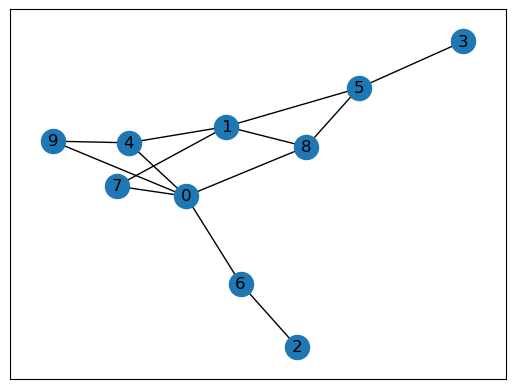

In [57]:
network_A = nx.gnp_random_graph(10, 0.35, seed=2023)

def monitored_connections(network, nodes):
    connections = set()
    for n in nodes:
        for u in network[n]:
            if n<u:
                connections.add((n,u))
            else:
                connections.add((u,n))
    return connections
    
def can_monitor_network(solution, i):
    global best_placement
    
    nodes = get_set(solution[0:i])

    if i==len(solution):
        if len(monitored_connections(network_A, nodes)) < len(network_A.edges):
            return False
        if best_placement is None or len(best_placement) > len(nodes):
            best_placement = nodes
            
    return True

best_placement = None

backtrack(
    solution = [None]*len(network_A),
    i = 0,
    possibilities = [True, False],
    is_feasible = can_monitor_network
)
print('Best placement:', best_placement)

nx.draw_networkx(network_A)
# monitored_connections(network_A, {0, 1, 2, 4, 5})